###Importing Libraries

In [5]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [11]:
!wget https://raw.githubusercontent.com/MYoussef885/Gold_Price_Prediction/refs/heads/main/gold_price_data.csv

--2024-11-13 16:20:47--  https://raw.githubusercontent.com/MYoussef885/Gold_Price_Prediction/refs/heads/main/gold_price_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131918 (129K) [text/plain]
Saving to: ‘gold_price_data.csv’

gold_price_data.csv 100%[===================>] 128.83K  --.-KB/s    in 0.004s  

2024-11-13 16:20:47 (28.7 MB/s) - ‘gold_price_data.csv’ saved [131918/131918]



###Data collection and Processing

In [12]:
#load the dataset
gold_data = pd.read_csv("/content/gold_price_data.csv")

In [13]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [16]:
#no of raws and columns
gold_data.shape

(2290, 6)

In [15]:
#getting basic information
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
#check no of missing value
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [18]:
#getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
   1. positive correlation
   2. Negative correlation

In [20]:
# Assuming 'Date' is the column with dates
# Convert 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features for correlation analysis
# Assuming 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD' are your numerical columns
numerical_features = ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']
correlation = gold_data[numerical_features].corr()

In [21]:
correlation = gold_data.corr()

<Axes: >

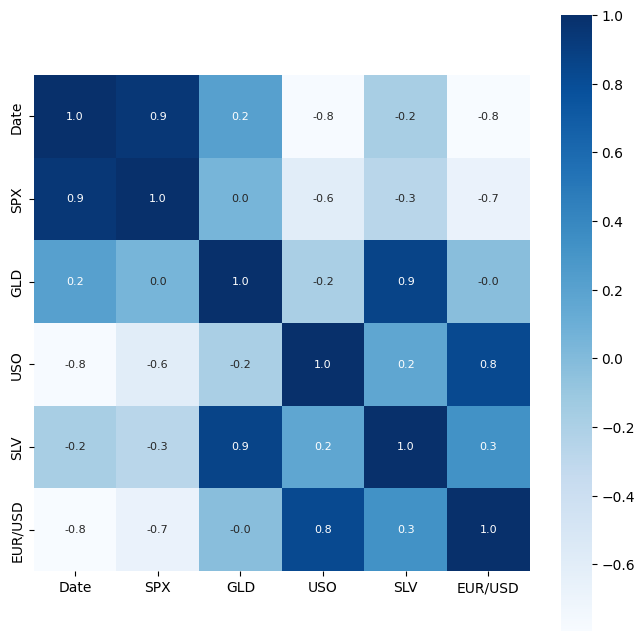

In [23]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=2, square=True,fmt=".1f",annot=True, annot_kws={"size":8}, cmap="Blues")

In [24]:
#correlation values of GLD
print(correlation["GLD"])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-25-d96ecd622db9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data["GLD"], color="green")


<Axes: xlabel='GLD', ylabel='Density'>

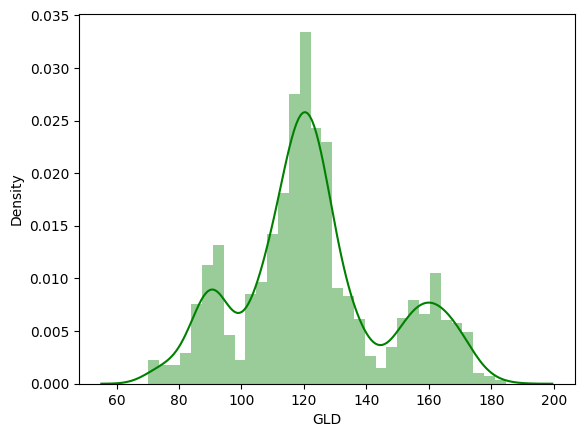

In [25]:
#check the distribution of the GLD price
sns.distplot(gold_data["GLD"], color="green")

###Splitting the Features and Target

In [26]:
x = gold_data.drop(["Date", "GLD"], axis=1)
y = gold_data["GLD"]

In [27]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


###Splitting into Traing data and Test data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

###Model Training

In [30]:
regressor = RandomForestRegressor(n_estimators=100)

In [31]:
#trai the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

#Model Evaluation

In [32]:
#prediction on test data
test_data_prediction = regressor.predict(x_test)

In [33]:
print(test_data_prediction)

[168.35859886  82.07579967 116.0177997  127.62080066 120.5552014
 154.81609789 150.63079828 126.24099987 117.35689882 126.05790067
 116.62890103 172.38950102 141.61139822 167.91529844 115.14260028
 117.65510069 138.34450345 170.06860081 159.82760323 158.48509987
 154.96740029 124.99009997 174.33849998 157.66290314 125.20390077
  93.6386      77.50609991 120.57229985 119.00529896 167.43690003
  88.43680031 125.25860023  91.17110084 117.60840016 121.22849896
 135.9326011  115.61400112 114.84710093 147.13720013 107.01750074
 104.31940236  87.29319782 126.52890012 117.89809974 153.13739915
 119.74559985 108.32470006 108.22149808  93.22620101 127.00599807
  74.44220041 113.58579949 121.04210041 111.21929911 119.0617989
 120.66939908 159.32179988 168.06560118 146.87509718  85.93939867
  94.30800036  86.79549874  90.58740017 118.91010075 126.44020077
 127.75439971 168.66030039 122.32669915 117.57949855  98.83600038
 168.23330111 143.50469841 131.62130292 121.14990208 121.22129938
 119.7006008

In [34]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894227424428336


###Compare the actual values and predicted values in a plot

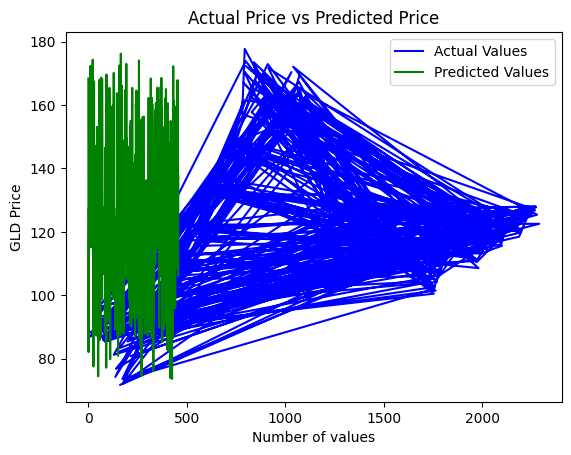

In [36]:
plt.plot(y_test, color="blue", label="Actual Values")
plt.plot(test_data_prediction, color="green", label="Predicted Values")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()